Please **submit this Jupyter notebook through Canvas** no later than **Monday November 19, 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

**Jordan Earle** (12297127)

**Natasja Wezel** (11027649)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

-----
# Exercise 1

# (a)
We have the table of data in the next cell.

Using `numpy.linalg.lstsq()`, fit a straight line, a quadratic function, and a cubic function to these data. Plot the data and your fitted functions in a graph.

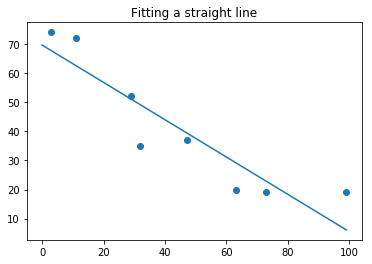

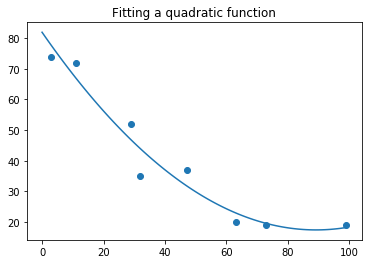

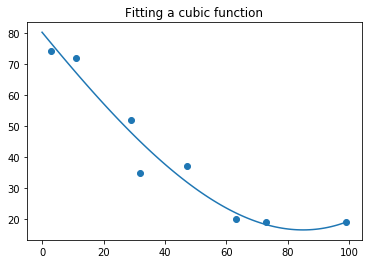

In [3]:
t = np.array([3, 11, 29, 32, 47, 63, 73, 99], dtype=np.float)
w = np.array([74, 72, 52, 35, 37, 20, 19, 19], dtype=np.float)

# make a line y = ax + b
A = np.vstack([t, np.ones(len(t))]).transpose()

m, b = np.linalg.lstsq(A, w, rcond=None)[0]

linemxb = []
squaremxb = []
cubemxb = []

for x in range(0, 100):
    linemxb.append((m*x) + b)
    
plt.figure(0)
plt.title("Fitting a straight line")
plt.scatter(t,w)
plt.plot(range(0,100), linemxb)

# make a quadratic function y = ax^2 + bx + c
tsquare = t**2

Asquared = np.vstack([tsquare, A.transpose()]).transpose()

a, b , c = np.linalg.lstsq(Asquared, w, rcond=None)[0]

for x in range(0, 100):
    squaremxb.append(a*(x**2) + b*x + c)

plt.figure(1)
plt.title("Fitting a quadratic function")
plt.scatter(t,w)
plt.plot(range(0,100), squaremxb)

# make a cubed function y = ax^3 + bx^2 + cx + d
tcubed = t**3

Acubed = np.vstack([tcubed, Asquared.transpose()]).transpose()

a,b,c,d = np.linalg.lstsq(Acubed, w, rcond=None)[0]

for x in range(0, 100):
    cubemxb.append(a*(x**3) + b*(x**2) + c * x + d)

plt.figure(2)
plt.title("Fitting a cubic function")
plt.scatter(t,w)
plt.plot(range(0,100), cubemxb)


## (b)
Compute the condition number of the associated Vandermonde matrix in each case.

In [4]:
Vm1 = np.vstack([np.ones(len(t)),t]).transpose()
Vm2 = np.vstack([np.ones(len(t)),t,tsquare]).transpose()
Vm3 = np.vstack([np.ones(len(t)),t,tsquare,tcubed]).transpose()

# so cond(x, p = None) uses 2 norm
condition_Vm1 = np.linalg.cond(Vm1)
print("Linear function:", condition_Vm1)

condition_Vm2 = np.linalg.cond(Vm2)
print("Quadratic function:", condition_Vm2)

condition_Vm3 = np.linalg.cond(Vm3)
print("Cubic function:", condition_Vm3)



Linear function: 95.97978844376205
Quadratic function: 10562.214789189244
Cubic function: 1192946.8771620495


As the functions become more fitted to the data, the inputs can cause major effects to the output.  The higher order functions are more fit to the data, and therefor will change must more with a small change to the input data. 

----
# Exercise 2
Planets follow an elliptical orbit, which can be represented in a Cartesian $(x,y)$-coordinate system by the equation
$$ ay^2 + bxy + cx + dy + e = x^2. $$

## (a)
Use `numpy.linalg.lstsq()` to determine the orbital parameters $a,b,c,d,e$ for the table of observations given below.
In addition, plot the resulting orbit and the data points in the $(x,y)$-plane.

In [5]:
# i don't know how to set the colors for the contourplot properly and that's why we need a list like this
color_list = ["red", "blue","green","orange","black", "sandybrown", "grey", "darkgreen", "darkblue", "purple"]

def solve_cartesian(x,y):
    # in A theres 5 columns for yy, xy, x, y, 1
    A = np.stack([y*y, x*y, x, y, np.ones(len(x))]).transpose()

    # these are the coefficients for the function , found by the least squares method
    a,b,c,d,e = np.linalg.lstsq(A, x*x, rcond=-1)[0]

    print("The coefficients are: ", a,b,c,d,e)

    # how to make a proper linspace for this function?
    linspace_x = np.linspace(-1, 2, 100)
    linspace_y = np.linspace(-1, 2, 100)

    X, Y = np.meshgrid(linspace_x,linspace_y)

    # i'm not sure if this is right I saw it on stackoverflow somewhere
    F = a * Y**2 + b * X * Y + c * X + d * Y + e - X**2 

    return X,Y,F

The coefficients are:  -2.635625483712108 0.1436461825988934 0.5514469631403587 3.2229403381059 -0.4328942702644514


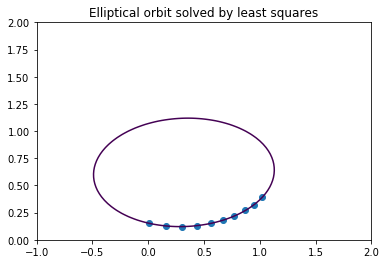

In [6]:
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)

X,Y,F = solve_cartesian(x,y)

# plot it
plt.contour(X,Y,F,[0.0])
plt.title("Elliptical orbit solved by least squares")
plt.scatter(x,y)
plt.xlim(-1,2)
plt.ylim(0,2)
plt.show()


## (b)
This least squares problem is nearly rank-deficient. To see what effect this has on the solution, perturb the input data slightly by adding random noise between -0.005 and 0.005 (using, for instance, `numpy.random.rand`), and solve the least squares problem with the perturbed data. Compare the new values for the parameters with those from (a). What effect does this difference have on the plot of the orbit?

The coefficients are:  -2.6356254837120865 0.14364618259889272 0.5518501777523191 3.2407410064866387 -0.44409267188164403
The coefficients are:  -2.6356254837120905 0.14364618259889161 0.560832095896596 3.2818844421508127 -0.4728137659992053
The coefficients are:  -2.635625483712135 0.1436461825989106 0.5523829833892856 3.338248297084821 -0.5059671508006123
The coefficients are:  -2.63562548371211 0.1436461825988936 0.5589156720188374 3.3469495484804583 -0.5136782156801267
The coefficients are:  -2.6356254837120496 0.14364618259887663 0.5823623894128915 3.239649139311281 -0.4534302682540129
The coefficients are:  -2.6356254837120248 0.14364618259886663 0.6328535472680212 3.405169144914017 -0.5769929153042989
The coefficients are:  -2.6356254837121598 0.14364618259891493 0.5802615562418341 3.3629025777994435 -0.531044393321331
The coefficients are:  -2.6356254837120745 0.14364618259888784 0.6050441790249461 3.249337622785543 -0.467234828743487
The coefficients are:  -2.6356254837121194 

<Figure size 432x288 with 0 Axes>

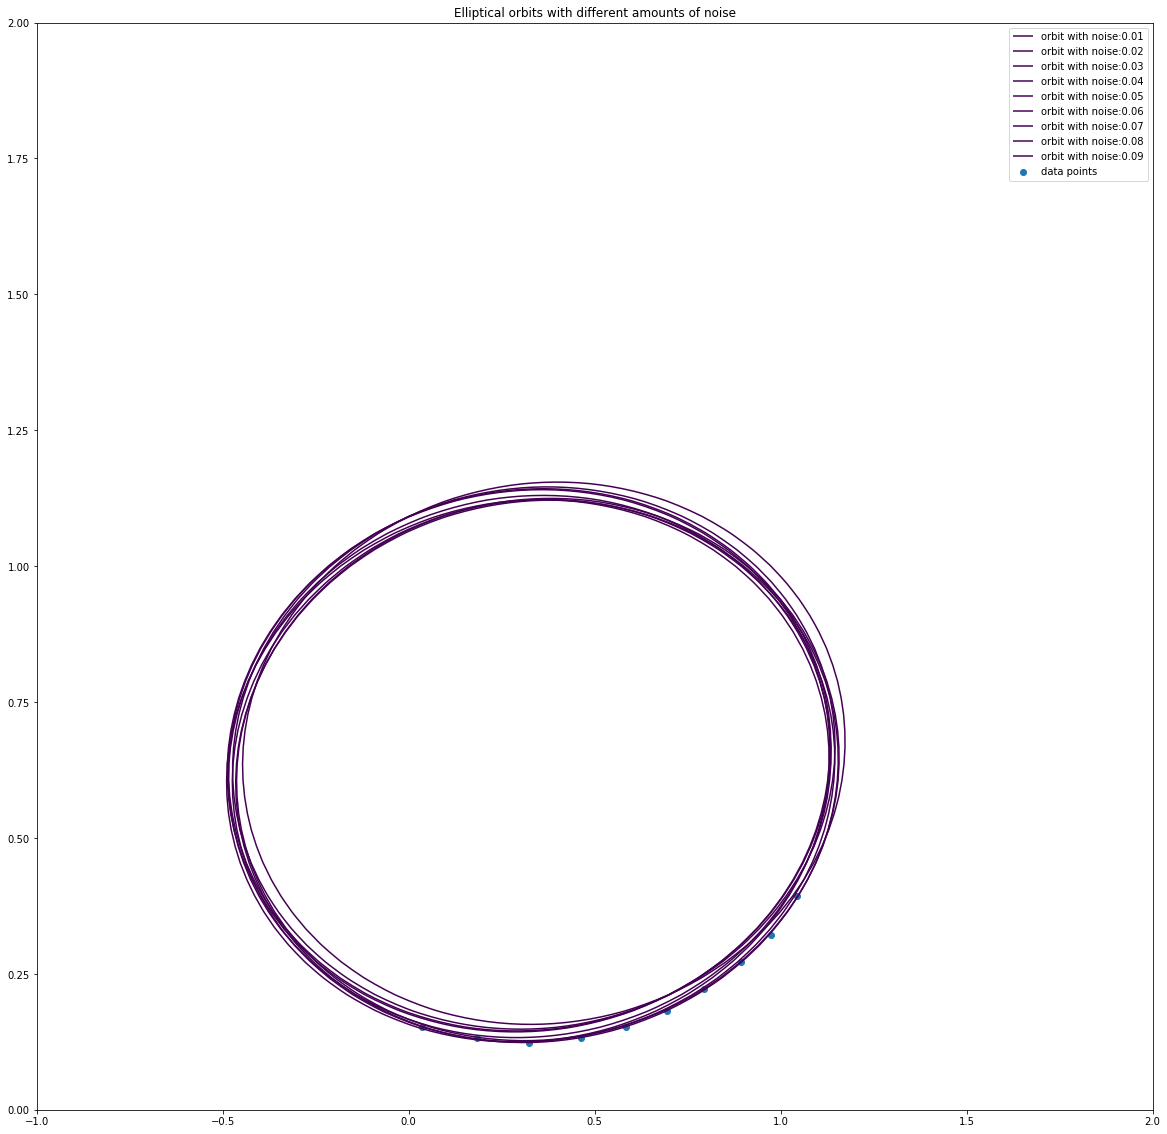

Apparently a little bit of noise doesn't make a big difference. The coefficients of the formula don't differ a lot with the coefficients the formula had without perturbed data.
NB: Using different colors here would probably not have made the graph more clear.


In [7]:
plt.figure(0)
plt.figure(figsize=(20,20))

for noise in range(1, 10):
    
    x2 = x + np.random.rand() * (noise/100 - 0.005)
    y2 = y + np.random.rand() * (noise/100 - 0.005)

    X, Y, F = solve_cartesian(x2,y2)

    # plot it
    CS = plt.contour(X,Y,F,[0.0])
    
    CS.collections[0].set_label("orbit with noise:" + str(noise/100))


plt.scatter(x2,y2, label="data points")
plt.xlim(-1,2)
plt.ylim(0,2)
plt.legend()
plt.title("Elliptical orbits with different amounts of noise")
plt.show()

print("Apparently a little bit of noise doesn't make a big difference. The coefficients of the formula don't differ a lot with the coefficients the formula had without perturbed data.")
print("NB: Using different colors here would probably not have made the graph more clear.")

The coefficients are:  -2.6356254837121167 0.14364618259891304 0.6639141613441228 3.694990817590436 -0.7867248735129616
The coefficients are:  -2.6356254837120714 0.14364618259889128 0.8935935622917569 3.5531812575452215 -0.7885002091318327
The coefficients are:  -2.635625483712097 0.14364618259890516 0.8620936434959948 3.3401496863164275 -0.6310456131742083
The coefficients are:  -2.635625483712079 0.14364618259888673 0.5497816663515496 4.368143114140271 -1.2671726512941321
The coefficients are:  -2.6356254837120234 0.14364618259886242 1.2368255950971951 4.115044923609172 -1.4072830026124556
The coefficients are:  -2.6356254837123143 0.1436461825989661 1.1838168671586695 5.066233157122955 -2.217533562893791
The coefficients are:  -2.6356254837120576 0.1436461825988664 0.7410150743264451 5.282654350905981 -2.1884621786998704
The coefficients are:  -2.6356254837121336 0.1436461825989105 1.0755600827744183 3.7602507639230818 -1.034051131336861
The coefficients are:  -2.635625483712023 0.

<Figure size 432x288 with 0 Axes>

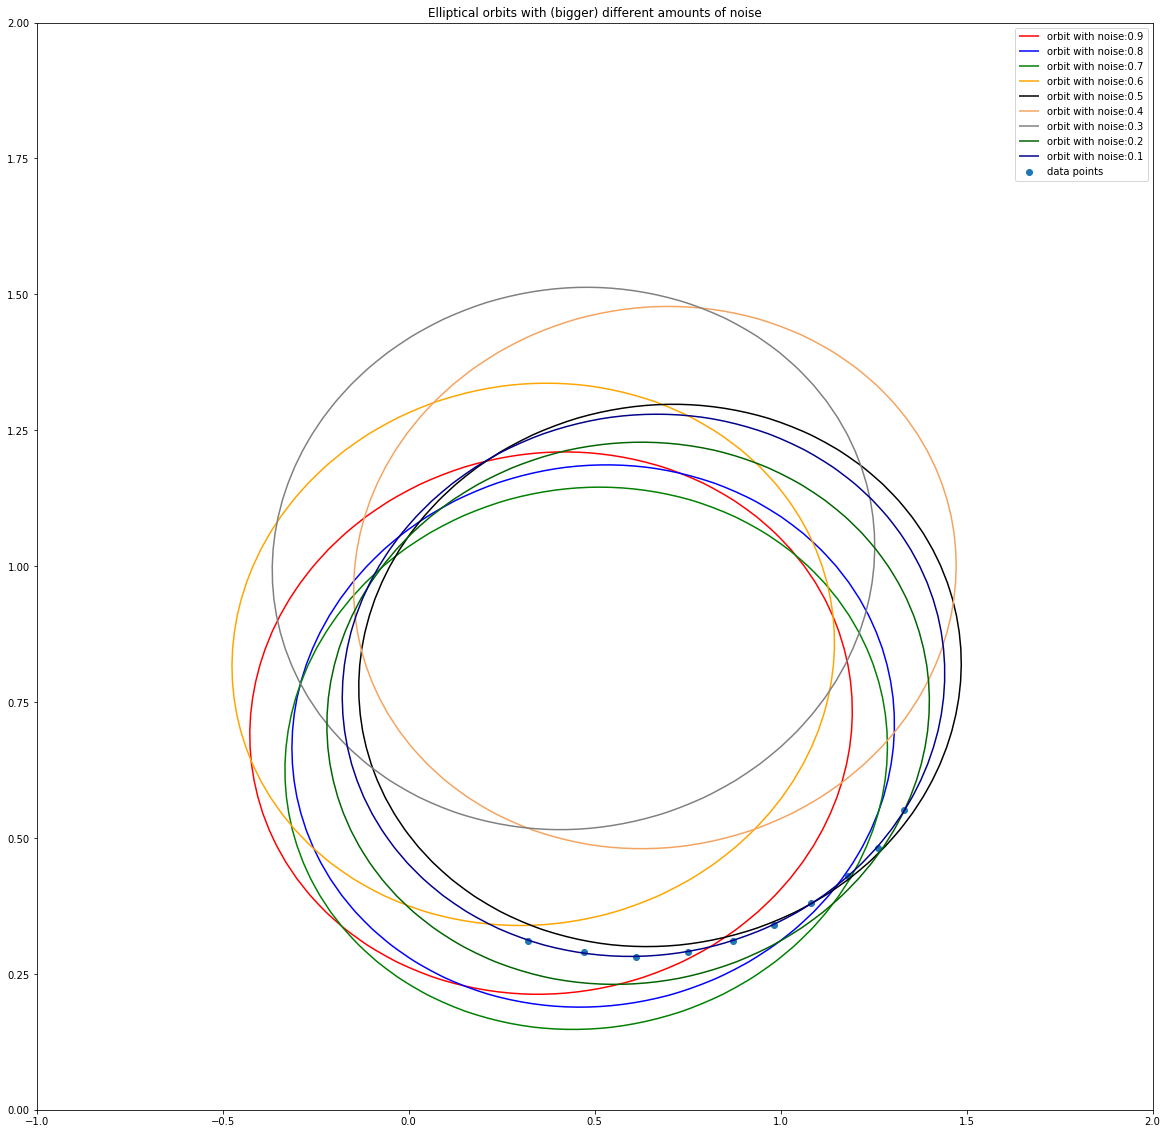

The coefficients here differ more from the ones in exercise a. We see that the first two coefficients stay pretty much the same all the time. We can also see that the orbits are in different places. The first orbit (with noise 0.1) still fits the data quite good. But the other ones are different. The differences differ each time you run this block of code, since the random noise can be pretty big, but doesn't have to be.


In [18]:
plt.figure(0)
plt.figure(figsize=(20,20))

for noise in range(1, 10):
    
    x2 = x + np.random.rand() * noise/10 - 0.005
    y2 = y + np.random.rand() * noise/10 - 0.005

    X, Y, F = solve_cartesian(x2,y2)

    # plot it
    CS = plt.contour(X,Y,F,[0.0], colors=color_list[noise - 1])
    
    CS.collections[0].set_label("orbit with noise:" + str((10-noise)/10))

plt.scatter(x2,y2, label="data points")
plt.xlim(-1,2)
plt.ylim(0,2)
plt.legend()
plt.title("Elliptical orbits with (bigger) different amounts of noise")
plt.show()

#print("differences\na:", differences[0],"\nb:", differences[1],"\nc:",differences[2],"\nd:",differences[3],"\ne:",differences[4])
print("The coefficients here differ more from the ones in exercise a. We see that the first two coefficients stay pretty much the same all the time. We can also see that the orbits are in different places. The first orbit (with noise 0.1) still fits the data quite good. But the other ones are different. The differences differ each time you run this block of code, since the random noise can be pretty big, but doesn't have to be.")

## (c)
Can you explain this behaviour?

The noise causes perturbations in the inputs, which will cause changes to the output.  As the system is rank difficient, the system is sensitive to perturbations in the input data (the noise).  As the least squares method was used to make R, the system is correspondly sensitive to pertibations in the problem data as can be seen in the graph above.

## (d)
Solve the same least squares problem again, for both the original *and* the perturbed data, this time using a routine specifically designed to deal with rank deficiencies. An example is `numpy.linalg.lstsq`, with the argument `rcond` as tolerance. Experiment with various tolerances, say $10^{-k}$ for $k \in \{1, ..., 5\}$. Compare the behaviour of the two solutions (one for the original input data, one for the perturbed data). How well do the resulting orbits fit the data points as the tolerance varies?

0.10441934702027524 0.340136609715485 0.8917887094168335 0.20248793097774528 -0.1717893875606339
0.41916487843578665 0.8768712738778587 0.5253450105330469 0.756138531245889 -0.16744777429279734
-2.635625483712108 0.1436461825988934 0.5514469631403587 3.2229403381059 -0.4328942702644514
-2.635625483712108 0.1436461825988934 0.5514469631403587 3.2229403381059 -0.4328942702644514
-2.635625483712108 0.1436461825988934 0.5514469631403587 3.2229403381059 -0.4328942702644514


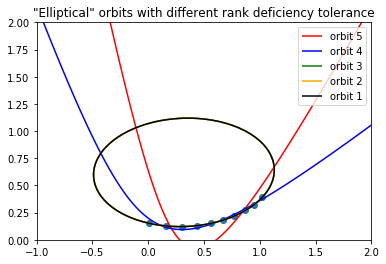

In [20]:
# HEY! This is a reminder for the mroning that I dont see the arguement rcond in here.   

# in A theres 5 columns for yy, xy, x, y, 1

A = np.stack([y*y, x*y, x, y, np.ones(len(x))]).transpose()

for k in range(5):
    coefficient = 10**-(k + 1)
    
    # these are the coefficients for the function , found by the least squares method
    a,b,c,d,e = np.linalg.lstsq(A, x*x, rcond=coefficient)[0]

    print(a,b,c,d,e)

    # how to make a proper linspace for this function?
    linspace_x = np.linspace(-1, 2, 100)
    linspace_y = np.linspace(-1, 2, 100)

    X, Y = np.meshgrid(linspace_x,linspace_y)

    # i'm not sure if this is right I saw it on stackoverflow somewhere
    F = a * Y**2 + b * X * Y + c * X + d * Y + e - X**2 

    # plot it
    CS = plt.contour(X,Y,F,[0.0], colors=color_list[k])

    CS.collections[0].set_label("orbit " + str(5-k))

    
plt.scatter(x,y)
plt.xlim(-1,2)
plt.ylim(0,2)
plt.legend()
plt.title("\"Elliptical\" orbits with different rank deficiency tolerance")
plt.show()



From the graph above, it can be seen that the data is fit better when the var rcond is lower.  It would appear that as if the rcond is set too high for the system, the routine does not handle the data well.